In [1]:
import pandas as pd
import numpy as np
import time
from datetime import date, datetime, timezone
import json
import requests
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import cv2
from collections import Counter
import warnings

from NFT_Analysis_functions import * #all the functions used
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

# Solana NFT Collection Analysis: OK Bears

(-0.5, 251.5, 188.5, -0.5)

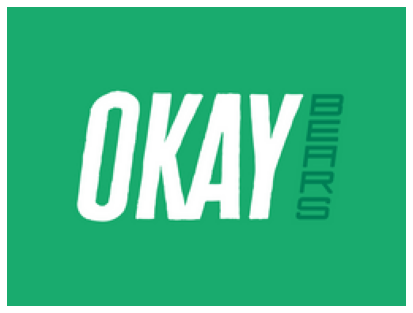

In [2]:
image = cv2.imread('OKBears.png')
image_display = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_display)
plt.axis('off')

## Current Holders of the collection

In [3]:
nft_collections = {'OKBears': ['3xVDoLaecZwXXtN59o6T3Gfxwjcgf8Hc9RfoqBn995P9','12f5732ce6ca33cbe4091cefbebf93543245e0278b4a557e5204e3d76287b289'],\
                  }
                   #collection:['candy machine id', collection id in solscan]

#Hash list of the collection , using https://pentacle.tools/nft-mints
candy_machine_id = nft_collections['OKBears'][0]
f = open(f'hash_list_{candy_machine_id}.json')
collection_hash_list = json.load(f)    

#holders, using https://pentacle.tools/nft-mints
#Date of snapshot: 7-1-2022
f = open(f'holders_{candy_machine_id}.json')
collection_holders_list = json.load(f)
ordered_holders = sorted(list(collection_holders_list.items()), key=lambda item: item[1]['amount'], reverse=True) #order dict

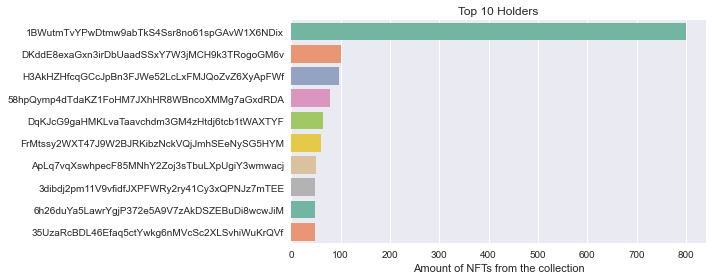

In [4]:
top_10_holders = ordered_holders[:10]
top_10_holders_count = {wallet[0]: wallet[1]['amount'] for wallet in top_10_holders}

fig, ax = plt.subplots(1,1, figsize=(10, 4))

sns.barplot(x=list(top_10_holders_count.values()), y=list(top_10_holders_count.keys()), palette='Set2')
plt.xlabel('Amount of NFTs from the collection')
plt.title('Top 10 Holders')
plt.tight_layout()

In [5]:
#getting the info for a specific wallet by the rank
get_info_by_ranking(10,ordered_holders)

{'rank': 10,
 'wallet': '35UzaRcBDL46Efaq5ctYwkg6nMVcSc2XLSvhiWuKrQVf',
 'amount': 48,
 'Tokens ID': ['Dis65x8V2Cffci9auWEwBdTboULKdb22wCDF2kwuceZT',
  'E3SnvZWnWh4XY6RHs5aL6UujB4YzuFwiagEsCQo5TqLc',
  'GHsX9VwAPXw1bSeo8cvBGngQTmhHS97mdxkKmdg4WTuA',
  'Axw54eppBRthwXqEsfZiFXHi8hPDPKY2e6dJFiHgnZTP',
  'Tj3fYdKJpA4Sp7Nd3xWCTgx8NZKvjwNvwsfWAjWJEnm',
  'DjoF1JnfkMuQeGed5tiZg6gVZpivfU1kXQREExz5tUxv',
  'Gpbw5HVJdbSx3qvaT8PcHTWVRtrNYVnHeQBQ8TQL2Zs1',
  'CYYzmGaLHd7ZX5ytUHySfhuby35wDZW92eqjZDE82Nf7',
  '7CxBHjGuLYBr5DUReERhmYF2ShDdRuwtLm3jLxofbzya',
  'CZY8DrK9zAFW4nUzeToLgMzouepwmFh65PsAEJUj36XN',
  'Gm6Qs7ZpJ2YLYBVEAGyosVxgMX4CjabT6EmtMMJjQ2vM',
  '9fw8Lmo3FCu27LqqruEkn3ZmdzJYomriA2tPrKnZzzPJ',
  '3mLf4di9fLgLfPaw63xZankCnzj1c7FviPARQw6LXFRq',
  '5cz1Dhvi9QScSzC42KeaXLCy8m7gtqLBxFtg2eb3cnyZ',
  '5J7EzwuRcJ3vSGKr3o8QuBon9RRNXEoxvt2BZEF5x8i6',
  '8HXS7Ui8WkiALre5qqgdPGGcR7tEkXmVZ5kAaKY5tton',
  '9sJDJFYpvAmVHGKGmCnKhotDjYyFr8Xg2FwwUxjhBSkj',
  '5bWn3FkV5H3pVeTSX34j9xgz9GSNKFZjgyMhNJBfUXmU',
 

## Getting the transactions history from the solscan API

In [6]:
print('Getting the transactions of the collection..')
start = time.time()

data = get_data(nft_collections['OKBears'][1])
print(f'done, took {round(time.time() - start,2)} secs to get the data')

data.head()

Getting the transactions of the collection..
done, took 3.42 secs to get the data


,_id,mint,name,symbol,buyer,seller,price,collection,collectionId,tradeTime,dex,signature,family,image,attributes
0,62c250cccecf0568788f0cf5,AMaabN1WkfTGBHqS8UooCDuRjgVc6fBwVhNw6VEMFgJN,Okay Bears #7222,OKB,J9ehF3m9YNNwi2eGgPYueojMtxVsnHrM7DNgsE7tMAH7,69gdHSEHnxdmX6S5Rv1rvfVoza44bNPBopPFQQFB7F2q,103.0,Okay Bears,12f5732ce6ca33cbe4091cefbebf93543245e0278b4a55...,2022-07-04 02:29:58+00:00,magiceden,1LUsUpt4Sv29BCn8ib6NaYa4qQ1YubhDcpLFUccESTtJot...,Okay Bears,https://bafybeidyl2strbzvh6y6m6uqetappblqnb52v...,"[{'trait_type': 'Background', 'value': 'Grey'}..."
1,62c22380cecf0568788eeeca,5Ta1F9STxiffNMH4cHoKVwi451xgwMYNt3frVYLyiafG,Okay Bear #4495,okay_bears,EV3EswNjLEpvQxZiWjcUS17ngfNH2P3pYGhMHF3dzWr,3GUAJZ9M4Ytds7N5ReFbQBcg4j21rmekz5TKEWqL9GWk,120.0,Okay Bears,12f5732ce6ca33cbe4091cefbebf93543245e0278b4a55...,2022-07-03 23:16:45+00:00,metaplex_auction_opensea,5gwi7VEuAUwHFtmoz94oLvSianM5V2LohmSoFfHriiQTJM...,Okay Bears,https://bafybeihfxg23r2riyywc7t5uxst7wwzx3ql4u...,"[{'trait_type': 'Background', 'value': 'Green'..."
2,62c22214cecf0568788eeccd,AJzNkNjvG9JA2pMYsw2dTXFeXS4k1HrrQXkxEmzRi5pE,Okay Bear #9416,okay_bears,H3AkHZHfcqGCcJpBn3FJWe52LcLxFMJQoZvZ6XyApFWf,2U2mUiEUWZZQMMo83Fh35Y5E9q67KQzbFgHpgFiFmSTp,99.0,Okay Bears,12f5732ce6ca33cbe4091cefbebf93543245e0278b4a55...,2022-07-03 23:10:28+00:00,magiceden,3y5wxWCNH4q9ZQp6nzQ88QxPMUnXn8RdDMoYL46hW7ofgD...,Okay Bears,https://bafybeib2ggvpvwlsn3bdquf44lv5r7lztsg6k...,"[{'trait_type': 'Background', 'value': 'Blue'}..."
3,62c210fbcecf0568788ee22c,77QRDk7zX7qrPiDwHsA4BRKv4nryeGcD52VNyDBMLcug,Okay Bears #5928,OKB,WH6jpmUTve8g6jjNUNUkw1hnATNXdqNK6LZF3dh9jTf,Ha1NqpuLiyzqbPhA44vpoqBYnDJvnuPbKE21k18ryjCt,102.0,Okay Bears,12f5732ce6ca33cbe4091cefbebf93543245e0278b4a55...,2022-07-03 21:57:45+00:00,magiceden,SkCKsNa6KC83mjEoyT9k7Vq9eQmzUj3nBkqxMmo1sNj344...,Okay Bears,https://bafybeihhqrpymfrbg3od2juvxxgi2cvtxqxix...,"[{'trait_type': 'Background', 'value': 'White'..."
4,62c1edd4cecf0568788ec1a2,7dbVa9fS18sS9a5HVNwrHGXse712EVsaoaFJbVyiEtuh,Okay Bear #8629,okay_bears,2khiKMDGyaAZQyoNo6mnPNUcPkLBTgBguMjddYDHechE,GE31Y78KCtEDatJ9USJfh95NraHsuRGTXrhYcu7tfWuS,110.0,Okay Bears,12f5732ce6ca33cbe4091cefbebf93543245e0278b4a55...,2022-07-03 19:27:40+00:00,magiceden,5BBV9QgkM9yj3ktEjv6Mn9dEyqaXE8b4kMawHzz2dRZfx4...,Okay Bears,https://bafybeid4ymauvvslixbb5sgsaagxsfophmzxb...,"[{'trait_type': 'Background', 'value': 'Blue'}..."


In [7]:
data.info()
#there are some nan values, must be dropped:
data.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18223 entries, 0 to 18222
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   _id           18223 non-null  object             
 1   mint          18223 non-null  object             
 2   name          18223 non-null  object             
 3   symbol        18223 non-null  object             
 4   buyer         18223 non-null  object             
 5   seller        18223 non-null  object             
 6   price         18223 non-null  float64            
 7   collection    18223 non-null  object             
 8   collectionId  18223 non-null  object             
 9   tradeTime     18223 non-null  datetime64[ns, UTC]
 10  dex           18223 non-null  object             
 11  signature     18223 non-null  object             
 12  family        18221 non-null  object             
 13  image         18221 non-null  object             
 14  attrib

## Getting the price and volume per day

First the data is going to be grouped in intervals of 1 day

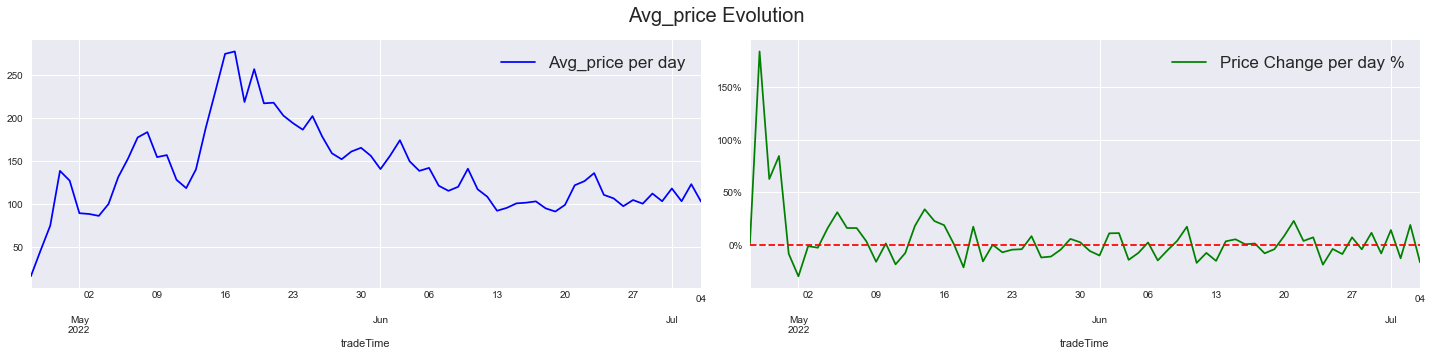

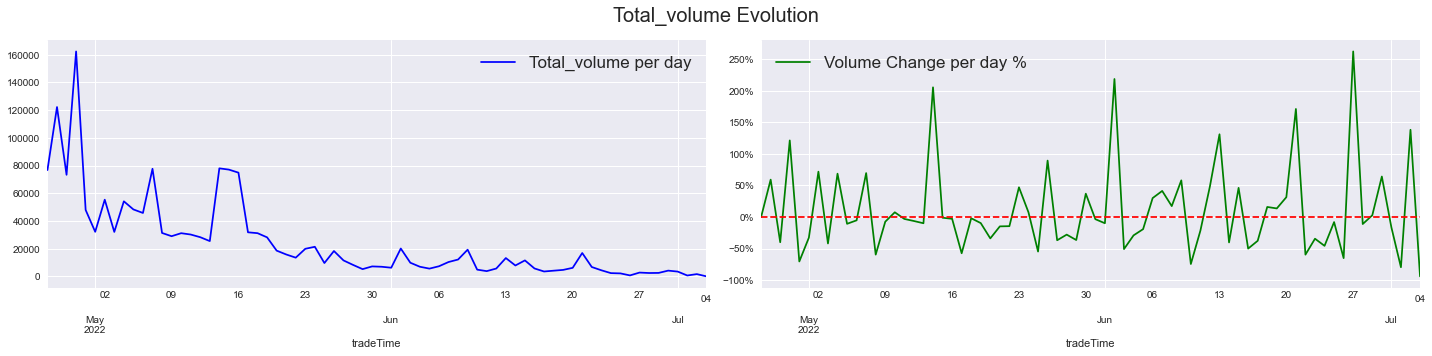

In [8]:
interval = '1d' #1h,4h,1d,1w
df_interval  = group_df_by_interval(data, interval)

plot_price_volume(df_interval)

## Checking the distribution of the collection attributes (only traded NFTs)

In [9]:
#droping duplicates NFTs (traded more than once)
data2 = data[['mint','name', 'attributes']]

data2['attributes'] = data2['attributes'].apply(lambda row: json.dumps(row))
data2 = data2[['mint','name', 'attributes']].drop_duplicates()
data2['attributes'] = data2['attributes'].apply(lambda row: json.loads(row))

data2.reset_index(drop=True,inplace=True)
data2.dropna(inplace=True)

Trades made from: 2022-04-26 to 2022-07-04
 (68 days 06:17:49) 

Trades made: 18221
Traded NFTs : 8085, 81% of the collection have been traded 

Traded NFT traits distribution: 



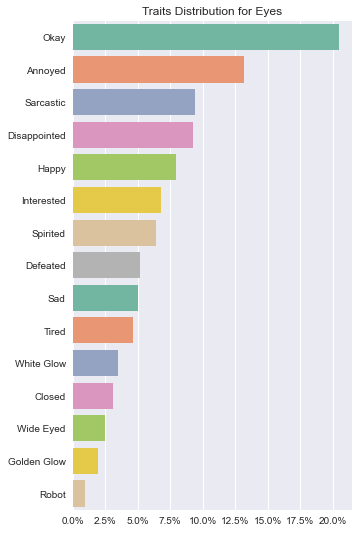

<Figure size 576x396 with 0 Axes>

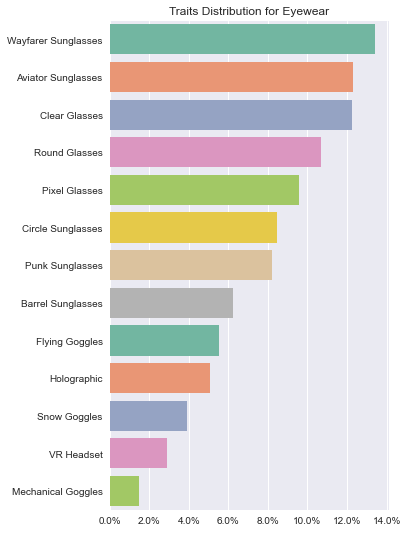

<Figure size 576x396 with 0 Axes>

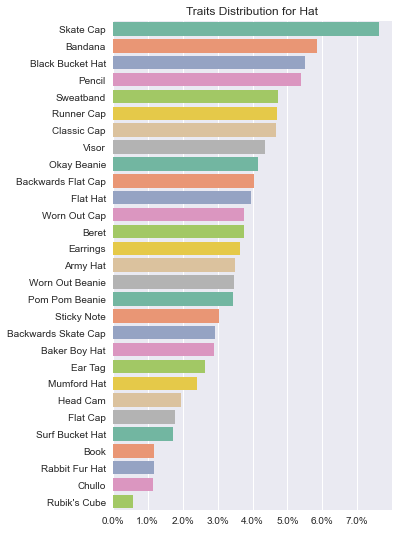

<Figure size 576x396 with 0 Axes>

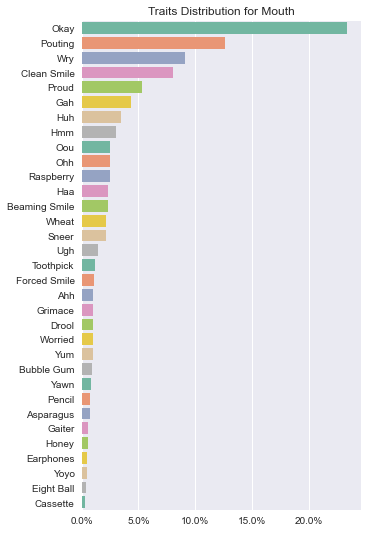

<Figure size 576x396 with 0 Axes>

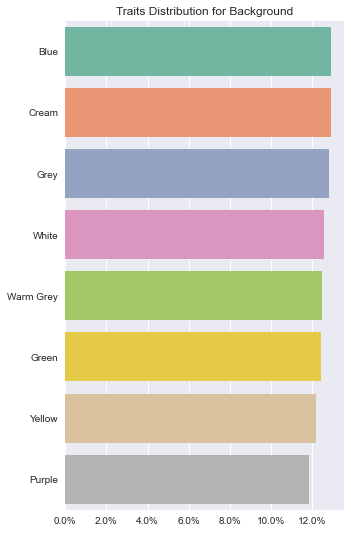

<Figure size 576x396 with 0 Axes>

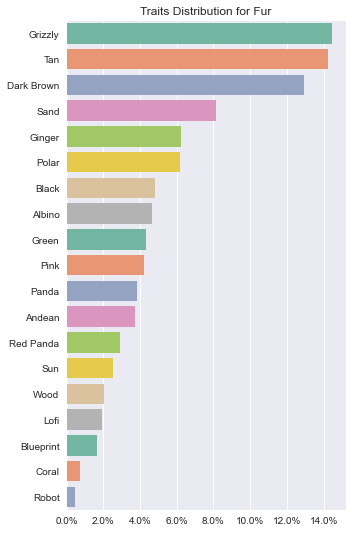

<Figure size 576x396 with 0 Axes>

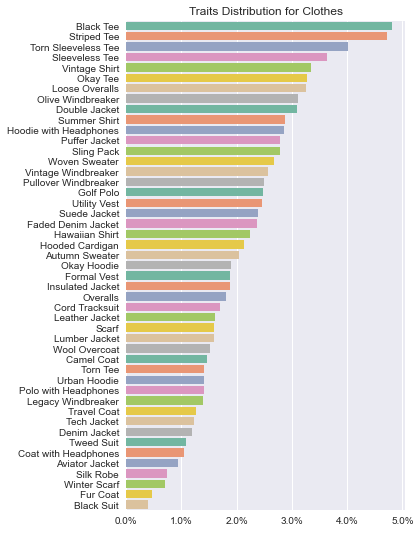

<Figure size 576x396 with 0 Axes>

In [10]:
#getting the traits
collection_traits = get_collection_traits(data2)

start_trades = data['tradeTime'].min()
end_trades = data['tradeTime'].max()
collection_size = 10000 #may vary!

print(f'Trades made from: {start_trades.date()} to {end_trades.date()}\n ({end_trades - start_trades}) \n')
print(f'Trades made: {len(data)}')
print(f'Traded NFTs : {len(data2)}, {len(data2)/collection_size:.0%} of the collection have been traded \n')
print('Traded NFT traits distribution: \n')

for key in list(collection_traits.keys()):
    plot_traits(collection_traits,key)

## Checking the highest trades

In [11]:
#checking the 10 most expensive trades
top = 10

top_trades = data.sort_values(by='price', ascending=False).iloc[:top,2:]
top_trades.reset_index(drop=True, inplace=True)

top_trades

,name,symbol,buyer,seller,price,collection,collectionId,tradeTime,dex,signature,family,image,attributes
0,Okay Bears #8729,OKB,GmqF92pqTp59tyRwnbjtqa9ei78oJ9FjisWWWN8EeVjh,2a7dFXQhegS8pKeeeWWL3MjCoZkqDmsJ1Y2cEEVsLuYX,1675.0,Okay Bears,12f5732ce6ca33cbe4091cefbebf93543245e0278b4a55...,2022-05-19 02:00:29+00:00,magiceden,2JE4asnT3Ju9kbUat2LCEFP5XPpNFFWVjQvKWpuksDonEr...,Okay Bears,https://bafybeigxv2qepxzxgxiwazxlqoxg5vmdvav45...,"[{'trait_type': 'Background', 'value': 'Grey'}..."
1,Okay Bear #1069,okay_bears,BeiJYMFonzZthp45hKMUgXw9MpQKeskQoK6CRGQZPWvx,7dZNJv7WNbVaCS73qXHg9phbEFKLEpzW6vZ98Di3ComF,1500.0,Okay Bears,12f5732ce6ca33cbe4091cefbebf93543245e0278b4a55...,2022-05-17 15:30:26+00:00,magiceden,54Wx1TD9MjUop2hXpxX5J9bCVwYeXtwBnsRWzRSCTBAyey...,Okay Bears,https://bafybeidbnpe6wopf66hjnwp45aicc4fw3g4b3...,"[{'trait_type': 'Background', 'value': 'Warm G..."
2,Okay Bear #5154,okay_bears,HFK8LBhQSFHkGWX6C9bCDWzuFfUFUA37aVcBZwxRT2wz,579GxXmgjsVkH1ggZVET6xZ2anp8cWqta8WacKtSBkfW,1200.0,Okay Bears,12f5732ce6ca33cbe4091cefbebf93543245e0278b4a55...,2022-05-07 19:13:38+00:00,magiceden,22JtwZ9u5DV439xeFVp86ULuhVX6ntLEE2r1y3moFtLwJK...,Okay Bears,https://bafybeigjwkkqf2qu7r4ydixzcqkgdnb2ad45n...,"[{'trait_type': 'Background', 'value': 'White'..."
3,Okay Bear #7992,okay_bears,BnJhP2vWqe9tEARKroBio7SU2imVNCg3y14LbSfHkqGp,6ZzkrkDDxnezvek5ZWHAd24AnLPdqoznUKxQthT72Lgv,1100.0,Okay Bears,12f5732ce6ca33cbe4091cefbebf93543245e0278b4a55...,2022-05-15 17:48:01+00:00,magiceden,Rbmx5r5mQH1DCJG8JFkJkZUNSLLKHwcCcnFzUjDRWSL9iP...,Okay Bears,https://bafybeidhtoxoge2xal6mxtn66ip3awwzdzvfa...,"[{'trait_type': 'Background', 'value': 'Blue'}..."
4,Okay Bears #991,OKB,7TkY22C4PZG4f6YbULzAtrS5mc6X9wu1MaspHuMgE5Xs,4W5QEE2rXcWKBMSojXABdNErta4cL31z8EawV4VmUfaN,1090.0,Okay Bears,12f5732ce6ca33cbe4091cefbebf93543245e0278b4a55...,2022-05-17 00:31:43+00:00,magiceden,2qKSXEkcWgw2XKRJzaw4TSrpHkJQbXsRbdQtzG57Q1Vub7...,Okay Bears,https://bafybeicdi6zjbia4mcle44lg5zhuraoaaa3kz...,"[{'trait_type': 'Background', 'value': 'Cream'..."
5,Okay Bear #6615,okay_bears,9bnbHhPbhS8h5UsZ9bkGM5U8Dz56HBSx97bSRhE9aRtV,BLwd5cWZKPP9NcD7oprr34UgYrcDA4LVXZym4Pzy3NB2,999.0,Okay Bears,12f5732ce6ca33cbe4091cefbebf93543245e0278b4a55...,2022-05-08 23:29:21+00:00,magiceden,3w1xqZL9CrjZPX4oxm4eQCTjLdQpBW9NX44ykxnM8cZFUi...,Okay Bears,https://bafybeifrqqpjyifja73fqsbedjl5kusxlru4z...,"[{'trait_type': 'Background', 'value': 'Purple..."
6,Okay Bear #2461,okay_bears,5atRHGSrys6fXK8G9vroLKLm2NyTFt8d5QxpjtEUp6zp,6ZzkrkDDxnezvek5ZWHAd24AnLPdqoznUKxQthT72Lgv,950.0,Okay Bears,12f5732ce6ca33cbe4091cefbebf93543245e0278b4a55...,2022-05-16 13:54:46+00:00,magiceden,tGYr7q9MmnM8WmMzo6Jndu51a6UmkmUkkzueoWX4v5e1EV...,Okay Bears,https://bafybeidcpoju6k6qgxea2zqqmv7xhw4t3kayh...,"[{'trait_type': 'Background', 'value': 'Cream'..."
7,Okay Bear #3234,okay_bears,6Ajugh74Ffx92ypuCF6VRf9xdNCATZMJAmfF5eC8UzdW,EE9PmcDQ3aGNxJ8iP6jqKRf95DdaU7dJwEQ8m3DBUo1p,840.0,Okay Bears,12f5732ce6ca33cbe4091cefbebf93543245e0278b4a55...,2022-05-15 16:18:58+00:00,magiceden,26LJDuzXTnRtQ569cEzPJMFyLYnuuj1g7Fc979uEaLwxzo...,Okay Bears,https://bafybeidaqjvooqcc2siskg4f3t2bm4mljskao...,"[{'trait_type': 'Background', 'value': 'Yellow..."
8,Okay Bear #3373,okay_bears,BeiJYMFonzZthp45hKMUgXw9MpQKeskQoK6CRGQZPWvx,A2weMaX3K5zuj3BXxtHvjaqVXEfrina8j8uFAo3vCR96,799.0,Okay Bears,12f5732ce6ca33cbe4091cefbebf93543245e0278b4a55...,2022-05-10 15:50:59+00:00,magiceden,5cjJaSyERJLELnpFguckbbrZWNUqxTtrNB6b1Xa3jioNYk...,Okay Bears,https://bafybeiaf3xea5l4zyknck43h4fznaxfzysxvb...,"[{'trait_type': 'Background', 'value': 'Green'..."
9,Okay Bears #2795,OKB,j6Gaj9hMF6r3Tcycmp7jj1PL4FFW4jkqgnWJJqgb9ca,6wqAyYSymGMSsZwW86cVG4fKdPBkKAH2nT8yHYWGCnKr,760.0,Okay Bears,12f5732ce6ca33cbe4091cefbebf93543245e0278b4a55...,2022-05-14 11:22:40+00:00,magiceden,oatwbvucwyiqqjiuWBsAufyB3wuKwCQjky3WEYJbRbK99V...,Okay Bears,https://bafybeicz2m436seirnc4nhnid3lntncb4dhnj...,"[{'trait_type': 'Background', 'value': 'Yellow..."


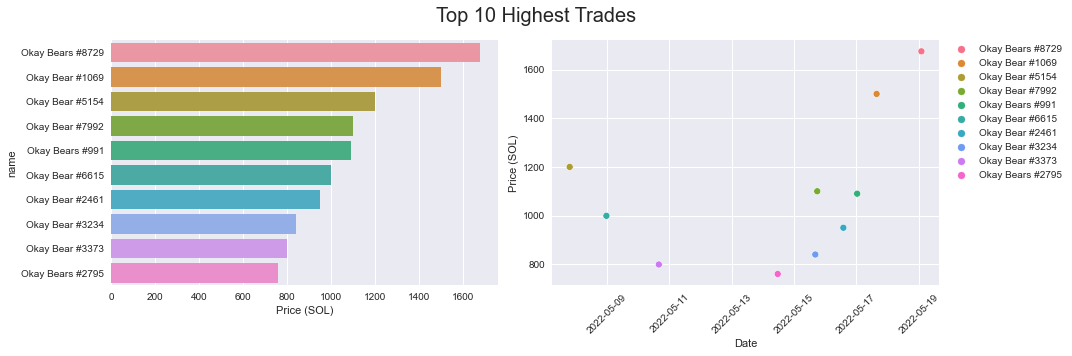

In [12]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
plt.suptitle(f'Top {top} Highest Trades',fontsize=20)

sns.barplot(x=top_trades.price, y=top_trades.name, ax=ax[0])
ax[0].set_xlabel('Price (SOL)')

sns.scatterplot(data=top_trades, x='tradeTime', y='price', hue='name',marker='o', ax=ax[1])
plt.xticks(rotation=45)
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Price (SOL)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()

In [14]:
#for getting the traits of a NFT
get_nft_traits(data,'Okay Bear #8729')

Token ID: hYV81H8JpS6tCugG9tUWfRoMFQVsk9dDRvojvjLKtPv


{'Background': 'Green',
 'Fur': 'Grizzly',
 'Mouth': 'Wry',
 'Eyes': 'Okay',
 'Hat': 'Black Bucket Hat',
 'Clothes': 'Black Tee',
 'Eyewear': 'Pixel Glasses'}

Top 10 Trades Traits: 


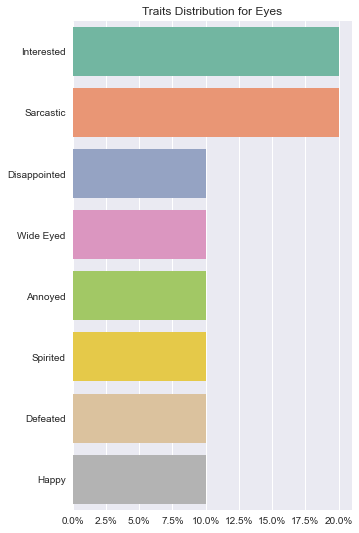

<Figure size 576x396 with 0 Axes>

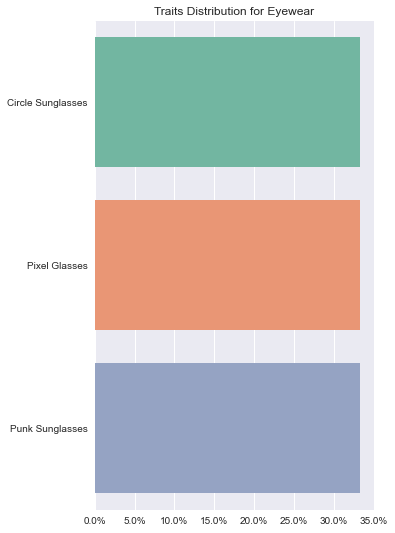

<Figure size 576x396 with 0 Axes>

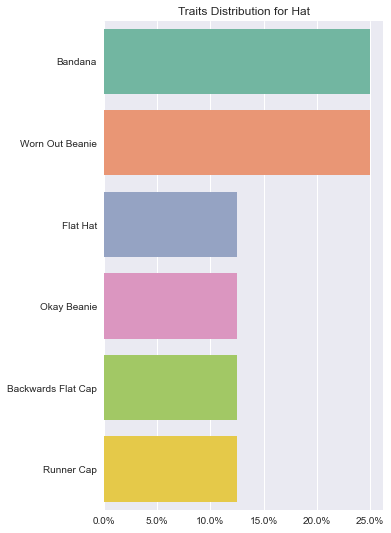

<Figure size 576x396 with 0 Axes>

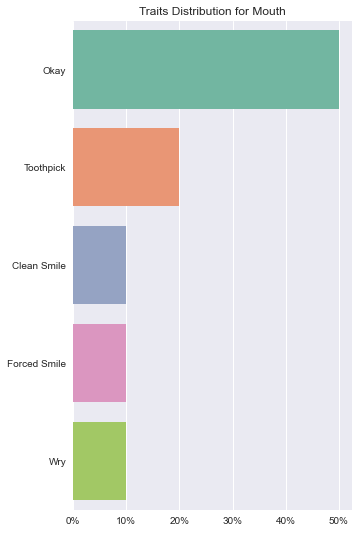

<Figure size 576x396 with 0 Axes>

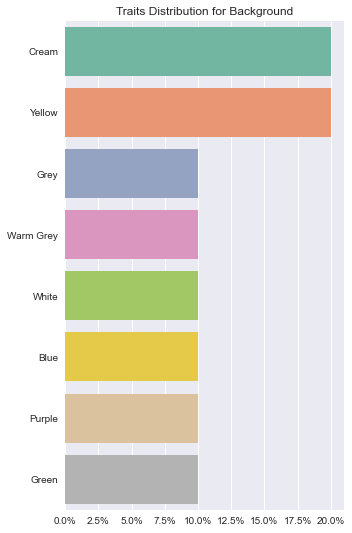

<Figure size 576x396 with 0 Axes>

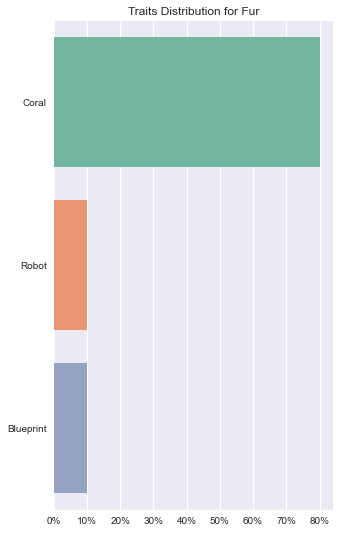

<Figure size 576x396 with 0 Axes>

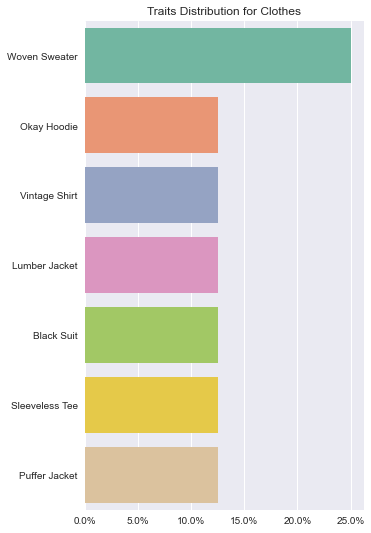

<Figure size 576x396 with 0 Axes>

In [15]:
top_10_traits = get_collection_traits(top_trades)

print(f'Top {top} Trades Traits: ')
for key in list(top_10_traits.keys()):    
    plot_traits(top_10_traits,key)
    plt.show()

Based on the top trades it looks that the Coral Fur is an expensive attribute. Lets check the trades that have this attribute: 

(array([19113., 19120., 19127., 19134., 19144., 19151.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

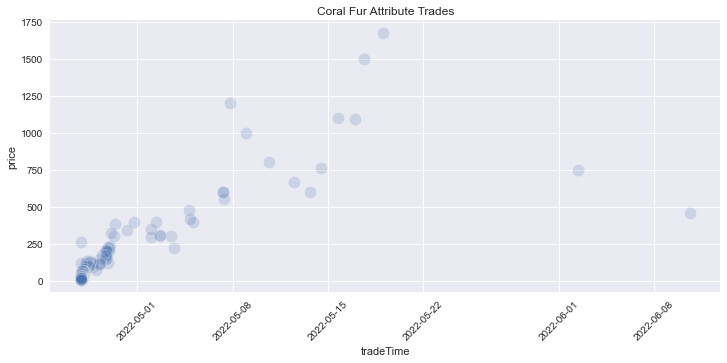

In [16]:
attribute = 'Fur'
value = 'Coral'

df_filter = filter_attribute(data, attribute,value)

fig, ax = plt.subplots(1,figsize=(12, 5))
sns.scatterplot(data=df_filter, x='tradeTime', y='price',marker='o', alpha=0.2,s=150)
plt.title('Coral Fur Attribute Trades')
plt.xticks(rotation=45)

#  Traders Analysis
An analysis for the top buyers, sellers and traders.

In [17]:
buyers = df_trades_analysis(data,'buyer')
sellers = df_trades_analysis(data,'seller')

## Top 15 Buyers

In [18]:
buyers[:15]

,wallet,Total SOL Spent,Trades (Buys),SOL Cost Avg (Buys),Min Date (Buy Trade),Max Date (Buy Trade)
0,H3AkHZHfcqGCcJpBn3FJWe52LcLxFMJQoZvZ6XyApFWf,19112.92077,128,149.32,2022-04-27 05:49:53+00:00,2022-07-03 23:10:28+00:00
1,6PU1ghTeBg4eGkB2gY1XFiJgpvxM6s4YtLyE7B9wGUwU,16264.60069,96,169.42,2022-05-05 11:05:04+00:00,2022-05-15 17:25:38+00:00
2,Guoj96CEn8JGfGnUXaxvQ5MpJqFJDAic41GvvNsoNiHh,12164.94049,79,153.99,2022-04-29 07:27:22+00:00,2022-05-05 11:02:37+00:00
3,BeiJYMFonzZthp45hKMUgXw9MpQKeskQoK6CRGQZPWvx,9478.43000,38,249.43,2022-04-27 02:27:16+00:00,2022-07-03 14:14:48+00:00
4,9k1feSQtgSQX7KbMwNbDSMzBHdG5n6EL6isyJPRVoWzQ,8139.30000,52,156.52,2022-05-05 02:30:28+00:00,2022-05-13 09:11:40+00:00
5,4a8tgM3jPejkVfRNm51BoqknNM6Ny3QDPenXddgRExtD,7647.27000,38,201.24,2022-05-19 04:39:26+00:00,2022-05-25 19:47:15+00:00
6,HFK8LBhQSFHkGWX6C9bCDWzuFfUFUA37aVcBZwxRT2wz,7533.88000,47,160.30,2022-04-28 19:41:33+00:00,2022-06-08 17:44:44+00:00
7,6h26duYa5LawrYgjP372e5A9V7zAkDSZEBuDi8wcwJiM,7376.01100,49,150.53,2022-05-08 03:07:56+00:00,2022-06-24 02:58:49+00:00
8,7TkY22C4PZG4f6YbULzAtrS5mc6X9wu1MaspHuMgE5Xs,6837.69000,23,297.29,2022-04-30 18:06:23+00:00,2022-06-13 02:35:28+00:00
9,CC9foyA9kfmEwJkwE9bhENY1UKHgZRNmsjJF8x1YHxRn,5755.79000,34,169.29,2022-04-29 23:49:07+00:00,2022-06-19 20:13:43+00:00


## Top 15 sellers

In [22]:
sellers[:15]

,wallet,Total SOL Sold,Trades (Sales),SOL Cost Avg (Sales),Min Date (Sell Trade),Max Date (Sell Trade)
0,6PU1ghTeBg4eGkB2gY1XFiJgpvxM6s4YtLyE7B9wGUwU,16622.8299,126,131.93,2022-05-09 01:53:07+00:00,2022-06-10 20:42:33+00:00
1,grd33LRXZKq1a8uKAViirHzoHKVUkzAoQici2rDHkZt,8294.6000,43,192.90,2022-05-16 13:34:40+00:00,2022-05-31 16:22:27+00:00
2,3dibdj2pm11V9vfidfJXPFWRy2ry41Cy3xQPNJz7mTEE,8036.0000,31,259.23,2022-05-15 19:37:42+00:00,2022-05-16 13:05:29+00:00
3,HC5cypTqgzHfGCwKuuJN6Vz6nBPUpEL1fHLXCLh4tCND,5197.1000,36,144.36,2022-04-26 23:15:52+00:00,2022-06-18 13:42:23+00:00
4,FGw6WhiPLET9XkEcPD2quCyJa8m528QFPM9cswQYKJn8,5110.0000,38,134.47,2022-04-29 13:40:12+00:00,2022-06-25 03:13:27+00:00
5,6ZzkrkDDxnezvek5ZWHAd24AnLPdqoznUKxQthT72Lgv,4329.5000,22,196.80,2022-04-27 00:03:06+00:00,2022-06-17 14:08:41+00:00
6,FZyyhmW1JBXvVP65HSbb4crHabpH8ZocHnyrewTW5HX6,4235.5000,27,156.87,2022-04-29 12:05:43+00:00,2022-06-10 13:59:40+00:00
7,4FdThNcxUT1VgCEpa6omCSr5EDs46xmaJefo17qkmr59,3676.9000,107,34.36,2022-04-26 21:18:02+00:00,2022-05-15 16:16:00+00:00
8,BPe96NvZPUxQqADtbatZFYXtEghXNaYsC7BVpkKPjTV5,3391.8000,17,199.52,2022-05-07 02:23:27+00:00,2022-05-18 03:12:06+00:00
9,7dZNJv7WNbVaCS73qXHg9phbEFKLEpzW6vZ98Di3ComF,3380.0000,11,307.27,2022-05-16 10:59:25+00:00,2022-06-07 03:12:07+00:00


## Top 15 traders
Considering only those who have bought and sold NFTs of the collection. 

The floor price from Magic Eden Marketplace is going to be considered to value the NFTs in the wallet (using the last snapshot)

In [24]:
collection_royalties = 0.075 #vary for each collection
marketplace_fee = 0.02 #considering Magic Eden marketplace fee.

traders = pd.merge(buyers, sellers, how='inner', on=['wallet'])
traders['profit'] = traders['Total SOL Sold']*(1-collection_royalties- marketplace_fee) - traders['Total SOL Spent']
traders = traders.sort_values(by='profit', ascending=False)
traders.reset_index(inplace=True, drop=True)
traders.rename(columns={'profit': 'Trades Profit'}, inplace=True)

#adding the NFTs in wallet
#getting the floor price from ME
symbol = 'okay_bears'
floor_price = float(get_collection_stats_ME(symbol)['floorPrice']*10**-9)

traders['NFTs in wallet'] = traders.apply(lambda row: amount_nfts_per_wallet(row['wallet'], ordered_holders), axis=1)
traders['NFTs value'] = traders['NFTs in wallet']*floor_price
traders['Total Profit (SOL)'] = traders['Trades Profit'] + traders['NFTs value']
traders.reset_index(inplace=True, drop=True)


In [25]:
sort_by = 'Total Profit (SOL)'

traders_ordered = traders.sort_values(by=sort_by, ascending=False)
traders_ordered.reset_index(inplace=True, drop=True)
traders_ordered[:15]
#traders_ordered[['wallet','Total SOL Spent', 'Total SOL Sold','Trades Profit',
#                 'NFTs in wallet','Total Profit (SOL)']][:15]

,wallet,Total SOL Spent,Trades (Buys),SOL Cost Avg (Buys),Min Date (Buy Trade),Max Date (Buy Trade),Total SOL Sold,Trades (Sales),SOL Cost Avg (Sales),Min Date (Sell Trade),Max Date (Sell Trade),Trades Profit,NFTs in wallet,NFTs value,Total Profit (SOL)
0,3dibdj2pm11V9vfidfJXPFWRy2ry41Cy3xQPNJz7mTEE,5389.780,34,158.52,2022-06-02 20:25:23+00:00,2022-06-02 20:38:26+00:00,8036.0,31,259.23,2022-05-15 19:37:42+00:00,2022-05-16 13:05:29+00:00,1882.8000,48,4992.0,6874.8000
1,grd33LRXZKq1a8uKAViirHzoHKVUkzAoQici2rDHkZt,675.000,3,225.00,2022-05-16 04:52:12+00:00,2022-05-18 16:25:22+00:00,8294.6,43,192.90,2022-05-16 13:34:40+00:00,2022-05-31 16:22:27+00:00,6831.6130,0,0.0,6831.6130
2,HC5cypTqgzHfGCwKuuJN6Vz6nBPUpEL1fHLXCLh4tCND,262.000,4,65.50,2022-05-02 14:07:09+00:00,2022-05-03 14:26:41+00:00,5197.1,36,144.36,2022-04-26 23:15:52+00:00,2022-06-18 13:42:23+00:00,4441.3755,0,0.0,4441.3755
3,6ZzkrkDDxnezvek5ZWHAd24AnLPdqoznUKxQthT72Lgv,820.000,6,136.67,2022-04-29 20:33:48+00:00,2022-05-20 17:38:08+00:00,4329.5,22,196.80,2022-04-27 00:03:06+00:00,2022-06-17 14:08:41+00:00,3098.1975,9,936.0,4034.1975
4,Hyzpu6vJQjCB6xETonc5s9Zpf8qN52irFWcpMhUM7a2X,880.490,8,110.06,2022-06-21 00:17:01+00:00,2022-06-29 07:44:08+00:00,1685.0,8,210.62,2022-05-09 03:27:19+00:00,2022-05-25 07:27:30+00:00,644.4350,19,1976.0,2620.4350
5,BLwd5cWZKPP9NcD7oprr34UgYrcDA4LVXZym4Pzy3NB2,110.000,1,110.00,2022-05-04 20:13:24+00:00,2022-05-04 20:13:24+00:00,2205.0,8,275.62,2022-05-05 22:39:24+00:00,2022-06-21 03:34:18+00:00,1885.5250,4,416.0,2301.5250
6,BrnKR4BBaqE5Aheg4qBJ2EySsgP4N9iwM4wNZDmu9zY2,2330.488,48,48.55,2022-04-27 07:17:02+00:00,2022-05-12 19:53:49+00:00,286.0,3,95.33,2022-05-04 03:33:05+00:00,2022-05-04 20:50:27+00:00,-2071.6580,42,4368.0,2296.3420
7,6Xdpe2hUD2rKYpQ78eYmbjekEHaS8KdRrZbVSZaKYHxL,543.740,7,77.68,2022-04-27 02:10:33+00:00,2022-05-10 12:28:41+00:00,2557.0,16,159.81,2022-04-29 01:58:08+00:00,2022-06-25 09:34:18+00:00,1770.3450,4,416.0,2186.3450
8,6wqAyYSymGMSsZwW86cVG4fKdPBkKAH2nT8yHYWGCnKr,671.690,8,83.96,2022-04-26 23:31:35+00:00,2022-05-18 15:43:23+00:00,2914.0,8,364.25,2022-04-29 23:11:55+00:00,2022-05-14 21:31:04+00:00,1965.4800,1,104.0,2069.4800
9,GCzN6NsT8wHNTk5892PwoGoYLpgUTwfF1ndWcc71ieXT,898.490,8,112.31,2022-04-29 07:24:36+00:00,2022-06-21 01:51:01+00:00,484.0,3,161.33,2022-04-29 10:35:57+00:00,2022-05-07 17:13:56+00:00,-460.4700,20,2080.0,1619.5300


### Most Traded NFTs of the collection

In [44]:
most_traded = Counter(data.mint)
most_traded = most_traded.most_common()
most_traded_df = pd.DataFrame(most_traded)
most_traded_df.columns=['Token ID', 'Times Traded']
top_15_most_traded = most_traded_df[:15]
top_15_most_traded

,Token ID,Times Traded
0,2E9NM1zugqH253SKiUDN22xnaVgH5vZz44Pv1e4V3PZq,10
1,84h13TxbW54sqvdDw2SYXHUstGGDQASZvFXEiYdUU634,9
2,JDuQ3Jy1isZLUXrDVKR8BVYnY18M8ckfJkaFKGzRnB6b,9
3,3mCqxSphrmerKT5M65FU2cATRBzTbUKpZYZ8o1axgp3a,9
4,4iZuPoqKUoVMXVcv4mXA5xSfAjsPo4aCLhLZibYr3QpC,9
5,6nKHHwE1xwgc1JpAL9bmu5N4PrxnG7oueyrPoUHedLHP,8
6,6LfEVWSvJNSeHreAQqHF3Th1Yu5EBv3YRZoiBSRC4ASL,8
7,J98vmjDmyH3WZPRyACHipU6xAWssfK1mAWzjAUZoZTrG,8
8,BHbXHTTpswKwT9Ne4UhCKvJAv5g71whHqsX7cBrwHV3h,8
9,FtzQeBeiemjZj9Ln7vv7zTVLAuYSwUUESEEaCuaNPdmh,8


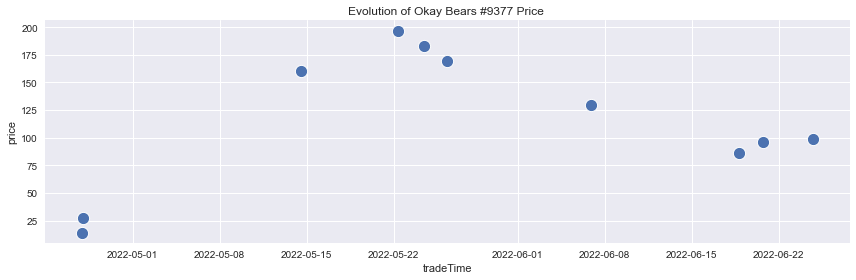

In [45]:
plot_nft_price_evolution(data,top_15_most_traded.loc[0,'Token ID']) #most traded NFT

## Owner changes 
How many times a NFT of the collection have been traded

Amount of trades per NFT: 2.25 on average


Text(0.5, 1.0, 'Amount of trades per NFT (Owner changes)')

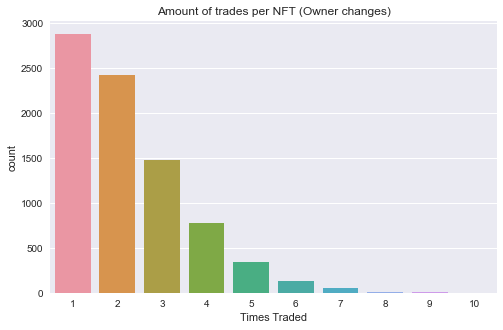

In [46]:
avg_changes = round(most_traded_df['Times Traded'].mean(),2)
print(f'Amount of trades per NFT: {avg_changes} on average')
fig, ax = plt.subplots(1,figsize=(8, 5))
sns.countplot(most_traded_df['Times Traded'])
plt.title('Amount of trades per NFT (Owner changes)')